# Homework 2

In [1]:
import numpy as np
import scipy.stats as sps
import scipy as sp
import matplotlib.pyplot as plt
from timeit import default_timer as timer

### Question 1

Let X be a standard normal RV and Y be a RV following cauchy distribution. Then $G_C(x)$ can be written as, 
\begin{equation}
G_C(x) = \frac{f_X(x)}{Cf_Y(x)} = \frac{1}{C} \sqrt{\frac{\pi}{2}} (1+x^2)e^{-x^2/2}
\end{equation}
which attains maximum for $x = \pm 1$. Thus, 
 
\begin{equation}
G_C(x) \leq \frac{1}{C} \sqrt{\frac{2\pi}{e}} -\infty < x < \infty
\end{equation}

So the value of $C$ which will make $G_C(x) \leq 1$ for all values x is $\sqrt{\frac{2\pi}{e}}$ which is 1.521

Thus, on average 15,210 cauchy random variable is needed to generate 10,000 standard normals


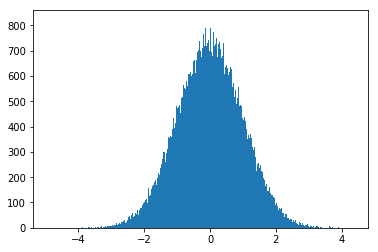

In [2]:
def inverse_cauchy(u):
    return np.tan(np.pi*(u-0.5))
def G_C_cauchy_normal(x):
    C = np.sqrt(2*np.pi/np.e)
    return np.sqrt(np.pi/2) * (1+x**2)*np.exp(-x**2/2)/C
def generate_normal_using_cauchy(n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    y = inverse_cauchy(u1)
    test_Val = G_C_cauchy_normal(y)
    count_success = np.sum(u2 < test_Val)
    result = y[u2<test_Val]
    return result

a = generate_normal_using_cauchy(152100)
p= plt.hist(a,bins=500,)

### Question 2

(a) I use the np package for both holding time sampling and sampling from the states while making a transition. The overall method takes a little less than 1 minute for 1,000,000 simulations.

In [3]:

Q = np.array([[-.1154, .1019, .0083, .0020, .0031, 0,0,0],
[.0091, -.1043, .0787, .0105, .0030, .0030, 0,0],
[.0010, .0309, -.1172, .0688, .0107, .0048, 0, .0010],
[.0007, .0047, .0713, -.1711, .0701, .0174, .0020, .0049],
[.0005, .0025, .0089, .0813, -.2530, .1181, .0144, .0273],
[0, .0021, .0034, .0073, .0568, -.1928, .0479, .0753],
[0,0,.0142, .0142, .0250, .0928, -.4318, .2856],
[0,0,0,0,0,0,0,0]])

P = np.array([[0,.8838, .0720, .0173, .0269, 0, 0, 0],
[.0872, 0, .7545, .1007, .0288, .0288, 0,0],
[.0085, .2637, 0, .5870, .0913, .0410, 0, .0085],
[.0041, .0275, .4167, 0, .4097, .1017, .0117, .0286],
[.0020, .0099, .0352, .3213, 0, .4668, .0569, .1079],
[0, .0109, .0176, .0379, .2946, 0, .2484, .3906],
[0, 0, .0329, .0329, .0579, .2149, 0, .6614],
[0,0,0,0,0,0,0,1]])
lam = np.array([.1153, .1043, .1172, .1711, .2530, .1929, .4318, .0001])


In [53]:
M = 8
#state M is absorbing
count_matrix = np.zeros(shape = (M,M))
num_paths = 1000000
T = 5
#start from state i, instantaneous transition matrix P, holding time rate
def sample_exp_holdtime(param):
    return np.random.exponential(scale=1/param)

def transition(i,P, lam,clock,endtime,sample_holdtime):
    if i == 7:
        return i
    rate = lam[i]
    #time = -np.log(1-np.random.rand())/rate
    time = sample_holdtime(rate)
    clock = clock + time 
    if clock >= endtime:
        return i
    else :
        new = np.random.multinomial(1,P[i,:],size=1)
        a = np.where(new==1)
        new_state = a[1][0]
        final_state = transition(new_state,P,lam,clock,endtime,sample_holdtime)
        return final_state
start = timer()
for i in range(M-1):
    for n in range(num_paths):
        a = transition(i,P,lam,0,T,sample_exp_holdtime)
        count_matrix[i][a] = count_matrix[i][a]+1
end = timer()

In [54]:
print("Transition Matrix estimation took", round(end-start,2), "seconds")

Transition Matrix estimation took 60.14 seconds


In [55]:
count_matrix[7,:] = np.array([0,0,0,0,0,0,0,num_paths])
P_est = count_matrix/num_paths
P_stderr = np.sqrt(P_est *(np.ones(M)-P_est)/num_paths)
P_t = sp.linalg.expm(Q*5)
F_norm = np.linalg.norm(P_est - P_t)
#measure of convergence
print("Frobenius Norm of the error matrix is : ", round(F_norm,5))

Frobenius Norm of the error matrix is :  0.00191


In [7]:
print("Estimated transition matrix between the interval of 0 to 5 is \n",P_est)
print("Standard error corresponding to each of the element of the matrix is \n",P_stderr)

Estimated transition matrix between the interval of 0 to 5 is 
 [[5.69093e-01 3.00957e-01 8.40320e-02 2.40760e-02 1.26130e-02 6.12200e-03
  6.41000e-04 2.46600e-03]
 [2.72280e-02 6.19030e-01 2.40519e-01 6.72870e-02 2.11810e-02 1.65620e-02
  1.60000e-03 6.59300e-03]
 [5.30400e-03 9.53160e-02 6.08348e-01 1.84877e-01 5.24880e-02 3.17160e-02
  3.64700e-03 1.83040e-02]
 [3.02700e-03 2.95520e-02 1.89904e-01 4.86344e-01 1.42435e-01 8.12670e-02
  1.16060e-02 5.58650e-02]
 [1.72900e-03 1.32240e-02 5.60690e-02 1.63177e-01 3.37844e-01 2.20113e-01
  3.34460e-02 1.74398e-01]
 [4.34000e-04 7.74500e-03 2.16580e-02 4.31270e-02 1.06853e-01 4.30197e-01
  5.89910e-02 3.30995e-01]
 [2.86000e-04 4.06700e-03 2.99310e-02 3.45490e-02 4.68850e-02 1.20722e-01
  1.28035e-01 6.35525e-01]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00]]
Standard error corresponding to each of the element of the matrix is 
 [[4.95203148e-04 4.58674050e-04 2.77435800e-04 1.5328517

(b) In this part I modify the holdtime sampling method from exponential to gamma distribution.

In [8]:
def sample_gamma_holdtime(param):
    return np.mean(np.random.exponential(scale=1/param,size=2))
count_matrix = np.zeros(shape = (M,M))
start = timer()
for i in range(M-1):
    for n in range(num_paths):
        a = transition(i,P,lam,0,T,sample_gamma_holdtime)
        count_matrix[i][a] = count_matrix[i][a]+1
end = timer()

In [9]:
print("Transition Matrix estimation took", round(end-start,2), "seconds")

Transition Matrix estimation took 150.88 seconds


In [10]:
count_matrix[7,:] = np.array([0,0,0,0,0,0,0,num_paths])
P_est_gamma = count_matrix/num_paths
P_stderr_gamma = np.sqrt(P_est *(np.ones(M)-P_est)/num_paths)
print("Estimated transition matrix between the interval of 0 to 5 for gamma distributed holding time is \n",P_est_gamma)
print("Standard error corresponding to each of the element of the matrix is \n",P_stderr_gamma)

Estimated transition matrix between the interval of 0 to 5 for gamma distributed holding time is 
 [[6.81175e-01 2.61533e-01 3.81380e-02 9.13200e-03 7.59200e-03 1.82900e-03
  1.50000e-04 4.51000e-04]
 [2.25270e-02 7.27256e-01 1.94086e-01 3.52020e-02 1.00260e-02 8.96200e-03
  4.83000e-04 1.45800e-03]
 [3.15100e-03 8.06010e-02 6.91784e-01 1.63990e-01 3.42930e-02 1.84160e-02
  1.30100e-03 6.46400e-03]
 [2.34100e-03 1.96960e-02 1.94525e-01 5.22595e-01 1.52507e-01 6.91780e-02
  8.22000e-03 3.09380e-02]
 [1.52200e-03 1.00040e-02 4.53990e-02 1.89783e-01 3.21541e-01 2.65241e-01
  3.31650e-02 1.33345e-01]
 [2.02000e-04 6.82800e-03 1.61470e-02 3.65950e-02 1.23224e-01 4.63791e-01
  7.14290e-02 2.81784e-01]
 [1.55000e-04 2.60400e-03 3.20280e-02 3.49850e-02 5.03510e-02 1.48842e-01
  8.29280e-02 6.48107e-01]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00]]
Standard error corresponding to each of the element of the matrix is 
 [[4.95203148e-04 4.58

The major observable difference between the transition matrices is the probability of transitioning to the state - 8, which is the state of default. I can observe that the probability of transitioning to the state of default is higher for the case of exponentially distributed holding time, compared to gamma distributed holding time, even though both the distribution have same mean holdting time. 

The reasoning behing this observation is due to the fact that gamma distribution for small rate parameter (which is the case for state 1 to 6), got heavier tail probability than exponential distribution. This results into chances of staying at initial state during the time interval of [0,5] more likely for gamma distribution. This chance is exactly 1 - CDF(5). On the other hand, as the rate parameter increases, the exponential distribution gets heavier tail probability than scaled gamma distribution which results into a reduction in probability of default starting from state 7. We can see the difference vector below

In [11]:
P_est[0:7,7] - P_est_gamma[0:7,7]

array([ 0.002015,  0.005135,  0.01184 ,  0.024927,  0.041053,  0.049211,
       -0.012582])

### Question 3

For the matrix shown below, we know the cholesky decomposition done in class. We can utilize the recursive approach and thus the $2\times2$ decomposition in finding the cholesky decomposition for the $3\times3$ and $4\times4$ matrix. 

\begin{equation*}
\left[\begin{array}{cc} 
1 & \rho\\
\rho & 1
\end{array}\right] = LL^T
\end{equation*}

where $L$ is, 
\begin{equation*}
L = \left[\begin{array}{cc} 
1 & 0\\
\rho & \sqrt{1-\rho^2}
\end{array}\right]
\end{equation*}

(a) For below matrix, we can write the cholesky decomposition matrix $L$ as, 

\begin{equation*}
\left[\begin{array}{cc} 
1 & \rho & \rho^2\\
\rho & 1 & \rho\\
\rho^2 & \rho & 1
\end{array}\right] = LL^T
\end{equation*}

where, 
\begin{equation*}
L = \left[\begin{array}{ccc} 
1 & 0 & 0\\
\rho & \sqrt{1-\rho^2} & 0\\
a & b & c
\end{array}\right]
\end{equation*}

and $a,b,c$ are unknown. 

\begin{equation*}
LL^T = \left[\begin{array}{ccc} 
1 & \rho & a\\
\rho & 1 & \rho a + \sqrt{1-\rho^2}b\\
a & \rho a + \sqrt{1-\rho^2}b & a^2 + b^2 + c^2
\end{array}\right] = 
\left[\begin{array}{cc} 
1 & \rho & \rho^2\\
\rho & 1 & \rho\\
\rho^2 & \rho & 1
\end{array}\right]
\end{equation*}

Equating the matrices element by element, we get, 

\begin{equation*}
a = \rho^2\\
\rho a + \sqrt{1-\rho^2}b = \rho\\
\implies \sqrt{1-\rho^2}b = \rho (1-\rho^2)
\implies b = \rho \sqrt{(1-\rho^2)}\\
a^2 + b^2 + c^2 = 1 \implies c = \sqrt{(1-\rho^2)}
\end{equation*}

Thus, the cholesky decomposition matrix is 

\begin{equation*}
L = \left[\begin{array}{ccc} 
1 & 0 & 0\\
\rho & \sqrt{1-\rho^2} & 0\\
\rho^2 & \rho \sqrt{(1-\rho^2)} & \sqrt{(1-\rho^2)}\\
\end{array}\right]
\end{equation*}

(b)

\begin{equation*}
\left[\begin{array}{cc} 
1 & \rho & \rho^2 & \rho^3\\
\rho & 1 & \rho & \rho^2\\
\rho^2 & \rho & 1 & \rho\\
\rho^3 & \rho^2 & \rho & 1\\
\end{array}\right] = LL^T
\end{equation*}

where, 
\begin{equation*}
L = \left[\begin{array}{ccc} 
1 & 0 & 0 & 0\\
\rho & \sqrt{1-\rho^2} & 0 & 0\\
\rho^2 & \rho \sqrt{(1-\rho^2)} & \sqrt{(1-\rho^2)} & 0\\
a & b & c & d \\
\end{array}\right]
\end{equation*}

and $a,b,c,d$ are unknown, with 

\begin{equation*}
LL^T = \left[\begin{array}{cc} 
1 & \rho & \rho^2 & \rho^3\\
\rho & 1 & \rho & \rho^2\\
\rho^2 & \rho & 1 & \rho\\
\rho^3 & \rho^2 & \rho & 1\\
\end{array}\right]
\end{equation*}

after solving we get,
\begin{equation*}
L = \left[\begin{array}{ccc} 
1 & 0 & 0 & 0\\
\rho & \sqrt{1-\rho^2} & 0 & 0\\
\rho^2 & \rho \sqrt{(1-\rho^2)} & \sqrt{(1-\rho^2)} & 0\\
\rho^3 & \rho^2\sqrt{1-\rho^2} & \rho \sqrt{(1-\rho^2)} & \sqrt{(1-\rho^2)} \\
\end{array}\right]
\end{equation*}




Looking at the solutions for $n=3$ and $n=4$, the conjecture for the cholesky decomposition matrix for a general n is the following matrix, 

\begin{equation*}
L = \left[\begin{array}{ccc} 
1 & 0 & 0 & 0 & 0& 0\\
\rho & \sqrt{1-\rho^2} & 0 & 0 & 0 & 0\\
\rho^2 & \rho \sqrt{(1-\rho^2)} & \sqrt{(1-\rho^2)} & 0&0&0\\
. & . & . &.  &0&0\\
. & . & . &.  &.&0\\
\rho^{n-1} & \rho^{n-2} \sqrt{1-\rho^2}&\rho^{n-3} \sqrt{1-\rho^2}&.&\rho \sqrt{1-\rho^2}&\sqrt{1-\rho^2}
\end{array}\right]
\end{equation*}

### Question 4

(a) I will generate $|X|$ where $X$ is standard normal, using the exponential distribution (Y). Then we have (from lecture), 

\begin{equation}
\frac{f_{|X|}(x)}{f_Y(x)} = \sqrt{\frac{2e}{\pi}}e^{-.5(x-1)^2}
\end{equation}

Therefore $C^* = \sqrt{\frac{2e}{\pi}} = 1.3155$ and $G_C(x) = e^{-.5(x-1)^2}$

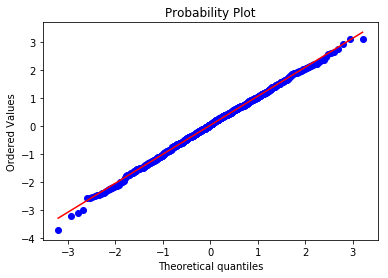

In [12]:
def G_C_exp_normal(x):
    C = np.sqrt(2*np.e/np.pi)
    return np.exp(-(x-1)**2/2)
def generate_normal_using_exp(n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    u3 = np.random.rand(n)
    y = -np.log(u1)
    test_Val = G_C_exp_normal(y)
    count_success = np.sum(u2 < test_Val)
    result = y[u2<test_Val]
    u3 = np.random.rand(len(result))-0.5
    return result*np.sign(u3)
normal_sample1 = generate_normal_using_exp(1320)
sample1_QQ = sps.probplot(normal_sample1,plot=plt) # n = 1000

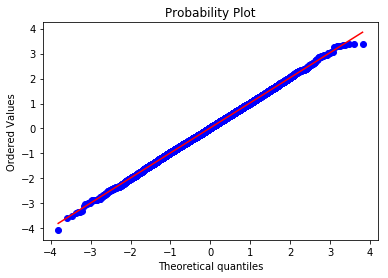

In [13]:
normal_sample2 = generate_normal_using_exp(13200)
sample2_QQ = sps.probplot(normal_sample2,plot=plt)#n=1000

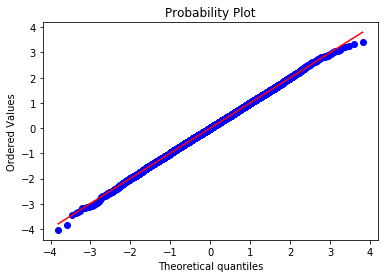

In [14]:
normal_sample3 = generate_normal_using_exp(13200)
sample3_QQ = sps.probplot(normal_sample3,plot=plt)#n=10000

Above Q-Q plots show a very well aligned straight line for all the sample sizes (n=100,1000,10000) which indicates the rejection algorithm is very efficient and accurate normal random number generator.

(b) In this section, I use the integral transform method and the generalized lambda distribution to generate standard normal random number and test the accuracy.

\begin{equation}
F^{-1}(x) = \lambda_1 + \frac{x^{\lambda_3} - (1-x)^{\lambda_4}}{\lambda_2}, 0 < x < 1
\end{equation}

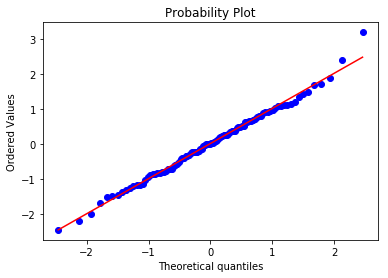

In [15]:
def generalized_lambda(u,lam1,lam2,lam3,lam4):
    x = lam1 + (u**lam3 - (1-u)**lam4)/lam2
    return x
def generate_normal_using_gen_lambda(n):
    lam1 = 0
    lam2 = 0.1975
    lam3 = 0.1349
    lam4 = 0.1349
    u = np.random.rand(n)
    x = generalized_lambda(u,lam1,lam2,lam3,lam4)
    return x

normal_sample1 = generate_normal_using_gen_lambda(100)
sample1_QQ = sps.probplot(normal_sample1,plot=plt)#n=100

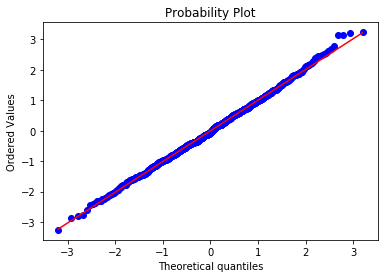

In [16]:
normal_sample2 = generate_normal_using_gen_lambda(1000)
sample2_QQ = sps.probplot(normal_sample2,plot=plt)#n=1000

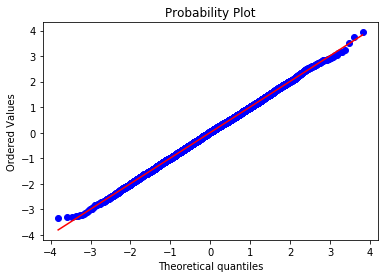

In [17]:
normal_sample3 = generate_normal_using_gen_lambda(10000)
sample3_QQ = sps.probplot(normal_sample3,plot=plt)#n=10000

The approximation using generalized lambda distribution does decent job for n = 1000, 10000, but  for n = 100, the Q-Q plot shows that the approximation doesn't perform very well and is less accurate the rejection algorithm based generator shown in part (a).


(c) In this section, I use the Litterman-Winkelmann method to generate samples from the prescribed distribution as following, 

$X =  w_1Z$ with probability $p$ and  $ w_2Z$ with probability $(1-p)$


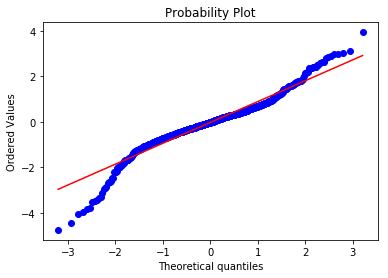

In [18]:
w1 = 0.6
w2 = 1.98

normal_samples = generate_normal_using_exp(1320)#n=1000
u = np.random.rand(len(normal_samples))
w = w1*(u<=0.82) + w2*(u>0.82)
x = normal_samples*w
sample1_QQ = sps.probplot(x,plot=plt)

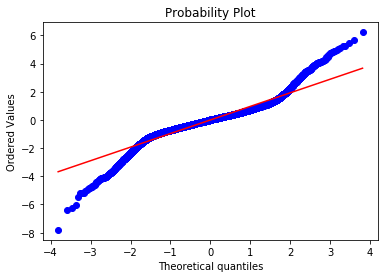

In [19]:
normal_samples = generate_normal_using_exp(13200)#n=1000
u = np.random.rand(len(normal_samples))
w = w1*(u<=0.82) + w2*(u>0.82)
x = normal_samples*w
sample2_QQ = sps.probplot(x,plot=plt)

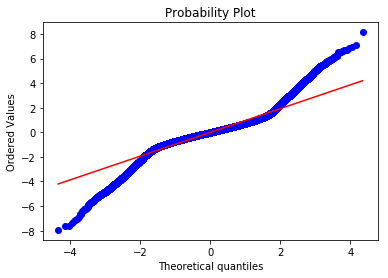

In [20]:
normal_samples = generate_normal_using_exp(132000)#n=10000
u = np.random.rand(len(normal_samples))
w = w1*(u<=0.82) + w2*(u>0.82)
x = normal_samples*w
sample3_QQ = sps.probplot(x,plot=plt)

We can observe from the Q-Q plot that the curve diverges from the normal distribution significantly as it has heavier tails. This is reflected by the quantile probabilities which is observed in the Q-Q plot. Thus, we can conclude that Litterman-Winklemann proposed distribution has heavier tails than normal distribution and doesn't follow normal distribution.

### Question 5

(a) We know the following to generate correlated normal random variable

\begin{equation}
X_1 = Z_1\\
X_2 = \rho Z_1 + \sqrt{1-\rho^2}Z_2\\
Z_1, Z_2,X_1,X_2 : N(0,1)\\
\mathrm{Corr}(X_1,X_2) = \rho
\end{equation}

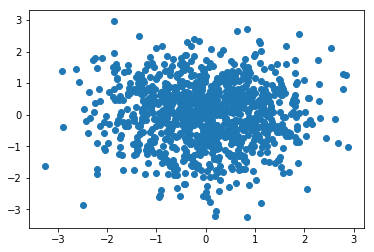

In [21]:
rho = 0.75
normal_samples = np.random.randn(4000)
n1 = normal_samples[:2000]
n2 = normal_samples[2000:]
x1 = n1[:1000]
y1 = n1[1000:]
x2 = n2[:1000]
y2 = rho*x2 + np.sqrt(1-rho**2)*n2[1000:]
plt.scatter(x1,y1)

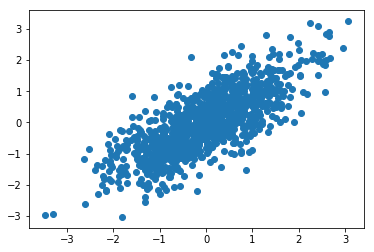

In [22]:
plt.scatter(x2,y2)

The first scatter plot shows the case where the standard normals generated have zero correlation and the second scatter plot shows the case where the correlation is 0.75. 

As the correlation increases, the random numbers become more and more aligned to the straight line $Y=X$ which corresponds to the case where the correlation is 1.00.


(b) To generate $t_4$ distribution we need to do the following modification. 

\begin{equation}
S : \chi_{\nu}^2\\
X_1 = \sqrt{\frac{\nu}{S}}Z_1\\
X_2 = \sqrt{\frac{\nu}{S}}(\rho Z_1 + \sqrt{1-\rho^2}Z_2)\\
Z_1, Z_2 : N(0,1)\\
X_1,X_2 : t_4\\
\mathrm{Corr}(X_1,X_2) = \rho
\end{equation}

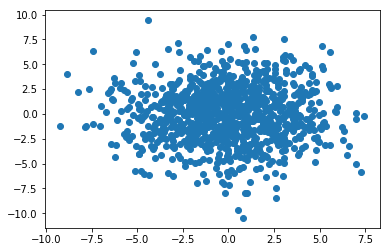

In [46]:
rho = 0.75
df = 4
normal_samples = np.random.randn(4000)
s = np.random.chisquare(df,2)
n1 = normal_samples[:2000]
n2 = normal_samples[2000:]
x1 = n1[:1000]*np.sqrt(df/s[0])
y1 = n1[1000:]*np.sqrt(df/s[0])
x2 = n2[:1000]*np.sqrt(df/s[1])
y2 = (rho*n2[:1000] + np.sqrt(1-rho**2)*n2[1000:])*np.sqrt(df/s[1])
plt.scatter(x1,y1)

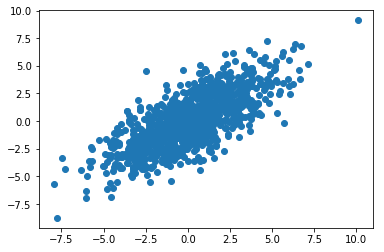

In [47]:
plt.scatter(x2,y2)

Similar to part (a), first scatter plot shows the case where the standard $t_4$ samples have zero correlation and the second scatter plot shows the case where the correlation is 0.75. 

Similar to case with standard bivariate normals, as the correlation increases, the random numbers become more and more aligned to the straight line $Y=X$ which corresponds to the case where the correlation is 1.00. 

Comparing above plots with the corresponding standard normal plots, we can observe that the range of values of the samples generated are much higher than the standard normals. For the case of standard normal, all the 1000 samples were within a range of [-3,4] whereas same number of samples from the $t_4$ distribution ranges from [-7.5,10] showing increased probability of high magnitude samples which corresponds to the heavier tail of the distribution.


(c) In this case, each component of the joint distribution has exponential(1) marginal distribution which has variance 1. 

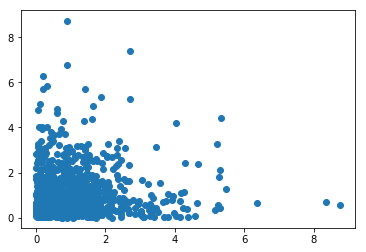

In [48]:
rho = 0.75
normal_samples = np.random.randn(4000)
n1 = normal_samples[:2000]
n2 = normal_samples[2000:]
u1 = sps.norm.cdf(n1)
X1 = -np.log(1-u1)
x1 = X1[:1000]
y1 = X1[1000:]

##x_2, y_2 are 1000 pairs of correlated standard normals
x_2 = n2[:1000]
y_2 = rho*n2[:1000] + np.sqrt(1-rho**2)*n2[1000:]

## ux2,uy2 are the 1000 pairs of set U
ux2 = sps.norm.cdf(x_2)
uy2 = sps.norm.cdf(y_2)

## x2,y2 are the 1000 pairs of generated samples after applying the inverse of the CDF of the marginal
## which is exponential(1) in this case
x2 = -np.log(1-ux2)
y2 = -np.log(1-uy2)

plt.scatter(x1,y1)

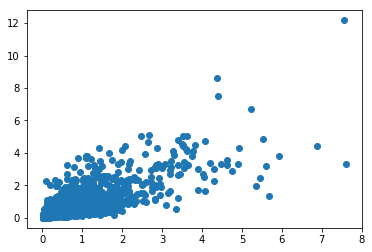

In [49]:
plt.scatter(x2,y2)

We can observe that the scatter plot only has positive samples which is expected as the marginal distribution is exponential(1). Also comparing the two plots, we can see that as the correlation increases, the generated samples gets more concentrated around the $Y=X$ line which is the expected behavior of the scatter.

(d) Similar to part (c), I generate the samples from a standard $t_4$ copula

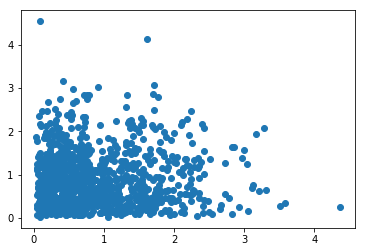

In [50]:
rho = 0.75
df = 4
normal_samples = np.random.randn(4000)
s = np.random.chisquare(df,2)
n1 = normal_samples[:2000]
n2 = normal_samples[2000:]
x_t1 = n1[:1000]*np.sqrt(df/s[0])
y_t1 = n1[1000:]*np.sqrt(df/s[0])
ux1 = sps.t.cdf(x_t1,df)
uy1 = sps.t.cdf(y_t1,df)
x1 = -np.log(1-ux1)
y1 = -np.log(1-uy1)

x_t2 = n2[:1000]*np.sqrt(df/s[1])
y_t2 = (rho*n2[:1000] + np.sqrt(1-rho**2)*n2[1000:])*np.sqrt(df/s[1])
ux2 = sps.t.cdf(x_t2,df)
uy2 = sps.t.cdf(y_t2,df)
x2 = -np.log(1-ux2)
y2 = -np.log(1-uy2)

plt.scatter(x1,y1)

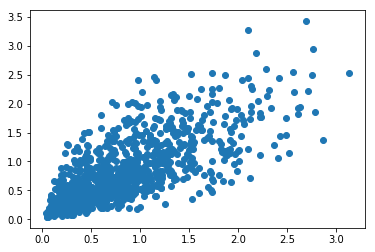

In [51]:
plt.scatter(x2,y2)

Above shows the scatter plot with standard $t_4$ copula. Similar to part (c), as correlation increases, the random samples concentrate more around the $Y=X$ line which is expected. 

Comparing the above plots to part (c), I can observe that the range of the generated samples are similar between the two plots as expected, because the marginal distributions are exponential(1). The difference that I can observe are the cluttering of samples. I can see that for standard normal copula, the datapoints are more cluttered near the center within the [0,1]X[0,1] box, whereas the 